# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
cities

['nizhneyansk',
 'butaritari',
 'belushya guba',
 'mataura',
 'sorland',
 'atar',
 'bethel',
 'vardo',
 'holme',
 'punta arenas',
 'ushuaia',
 'vaini',
 'qaanaaq',
 'rikitea',
 'sao filipe',
 'hermanus',
 'cherskiy',
 'east london',
 'luderitz',
 'saint-philippe',
 'san juan',
 'hearst',
 'chokurdakh',
 'khatanga',
 'georgetown',
 'new norfolk',
 'jamestown',
 'magadan',
 'mar del plata',
 'aklavik',
 'busselton',
 'airai',
 'atuona',
 'guerrero negro',
 'visnes',
 'hervey bay',
 'barrow',
 'seoul',
 'gondanglegi',
 'bluff',
 'khani',
 'dikson',
 'bengkulu',
 'arraial do cabo',
 'ulladulla',
 'ayagoz',
 'tiksi',
 'aripuana',
 'kahului',
 'barentsburg',
 'berlevag',
 'port alfred',
 'xiuyan',
 'udachnyy',
 'san cristobal',
 'carman',
 'gornyye klyuchi',
 'springbok',
 'iracoubo',
 'coquimbo',
 'sinkat',
 'kapaa',
 'hadgaon',
 'abu samrah',
 'yellowknife',
 'avarua',
 'ocampo',
 'carnarvon',
 'san patricio',
 'kodiak',
 'popondetta',
 'thompson',
 'haines junction',
 'bredasdorp',
 'harp

In [ ]:
place = "London"
query_url2 = url + "appid=" + weather_api_key + "&units=" +units + "&q=" + place
weather_json = requests.get(query_url2).json()
print(weather_json)

In [ ]:
weather_json.keys()

In [ ]:
weather_json['main'].keys()

In [ ]:
weather_json['main']['temp']

In [5]:
list_cities = []
temp = []
lat = []
long = []
cloud_pct = []
wind_speed = []
humidity = []
city_num = 1

for city2 in cities:
    response = requests.get(query_url + city2).json()
    
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloud_pct.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        list_cities.append(city2)
        print(f"Working on #{city_num} - {city2}")
        city_num = city_num + 1

    except:
        print("---------City not found. skipping...")
        pass

print("-------------Done------------")

City not found. Skipping...
Working on 1 - butaritari
City not found. Skipping...
Working on 2 - mataura
Working on 3 - sorland
Working on 4 - atar
Working on 5 - bethel
Working on 6 - vardo
Working on 7 - holme
Working on 8 - punta arenas
Working on 9 - ushuaia
Working on 10 - vaini
Working on 11 - qaanaaq
Working on 12 - rikitea
Working on 13 - sao filipe
Working on 14 - hermanus
Working on 15 - cherskiy
Working on 16 - east london
Working on 17 - luderitz
Working on 18 - saint-philippe
Working on 19 - san juan
Working on 20 - hearst
Working on 21 - chokurdakh
Working on 22 - khatanga
Working on 23 - georgetown
Working on 24 - new norfolk
Working on 25 - jamestown
Working on 26 - magadan
Working on 27 - mar del plata
Working on 28 - aklavik
Working on 29 - busselton
Working on 30 - airai
Working on 31 - atuona
Working on 32 - guerrero negro
Working on 33 - visnes
Working on 34 - hervey bay
Working on 35 - barrow
Working on 36 - seoul
Working on 37 - gondanglegi
Working on 38 - bluff


Working on 289 - panzhihua
Working on 290 - de-kastri
Working on 291 - sao joao da barra
Working on 292 - cairns
Working on 293 - cachoeira do sul
Working on 294 - cabo san lucas
Working on 295 - batagay-alyta
Working on 296 - karpogory
Working on 297 - tarauaca
Working on 298 - akdepe
Working on 299 - hamilton
Working on 300 - tual
Working on 301 - solnechnyy
Working on 302 - novikovo
Working on 303 - westport
Working on 304 - hibbing
City not found. Skipping...
Working on 305 - jalu
Working on 306 - leninsk
Working on 307 - puerto suarez
Working on 308 - sitka
Working on 309 - gouyave
Working on 310 - zaqatala
Working on 311 - datong
Working on 312 - provideniya
Working on 313 - padang
Working on 314 - tailai
Working on 315 - iqaluit
Working on 316 - ihosy
Working on 317 - codrington
Working on 318 - durban
Working on 319 - marsabit
Working on 320 - kirakira
Working on 321 - port augusta
Working on 322 - escanaba
Working on 323 - cidreira
Working on 324 - livingston
Working on 325 - 

In [6]:
list_cities, temp, lat, long, cloud_pct, wind_speed, humidity

(['butaritari',
  'mataura',
  'sorland',
  'atar',
  'bethel',
  'vardo',
  'holme',
  'punta arenas',
  'ushuaia',
  'vaini',
  'qaanaaq',
  'rikitea',
  'sao filipe',
  'hermanus',
  'cherskiy',
  'east london',
  'luderitz',
  'saint-philippe',
  'san juan',
  'hearst',
  'chokurdakh',
  'khatanga',
  'georgetown',
  'new norfolk',
  'jamestown',
  'magadan',
  'mar del plata',
  'aklavik',
  'busselton',
  'airai',
  'atuona',
  'guerrero negro',
  'visnes',
  'hervey bay',
  'barrow',
  'seoul',
  'gondanglegi',
  'bluff',
  'khani',
  'dikson',
  'bengkulu',
  'arraial do cabo',
  'ulladulla',
  'ayagoz',
  'tiksi',
  'aripuana',
  'kahului',
  'berlevag',
  'port alfred',
  'xiuyan',
  'udachnyy',
  'san cristobal',
  'carman',
  'gornyye klyuchi',
  'springbok',
  'iracoubo',
  'coquimbo',
  'kapaa',
  'hadgaon',
  'abu samrah',
  'yellowknife',
  'avarua',
  'ocampo',
  'carnarvon',
  'san patricio',
  'kodiak',
  'popondetta',
  'thompson',
  'haines junction',
  'bredasdorp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df = pd.DataFrame({
    'City': list_cities,
    'Temperature': temp,
    'Latitude': lat,
    'Longitude': long,
    'Cloudiness': cloud_pct,
    'Wind_Speed': wind_speed,
    'Humidity': humidity
})

In [10]:
cities_df

,City,Temperature,Latitude,Longitude,Cloudiness,Wind_Speed,Humidity
0,butaritari,28.09,3.0707,172.7902,39,5.48,76
1,mataura,8.33,-46.1927,168.8643,92,1.34,91
2,sorland,2.76,67.6670,12.6934,61,11.24,67
3,atar,31.37,20.5169,-13.0499,2,4.25,12
4,bethel,20.71,41.3712,-73.4140,1,3.60,21
...,...,...,...,...,...,...,...
562,harnosand,3.84,62.6323,17.9379,75,5.66,35
563,qui nhon,26.31,13.7667,109.2333,8,1.39,84
564,agirish,6.08,61.9247,63.0231,100,1.85,90
565,nkoteng,21.73,4.5167,12.0333,97,1.92,90


In [9]:
cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
hum_over_100 = len(cities_df.loc[cities_df["Humidity"] > 100, :])
print(f"There are {hum_over_100} cities with humidity above 100%")

There are 0 cities with humidity above 100%


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

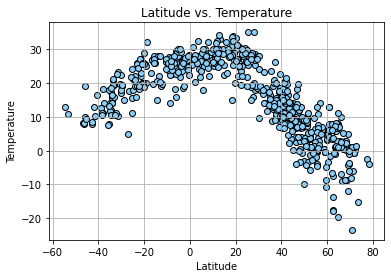

In [24]:
x = cities_df['Latitude']
y = cities_df['Temperature']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("output_data/lat_temp.png")
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

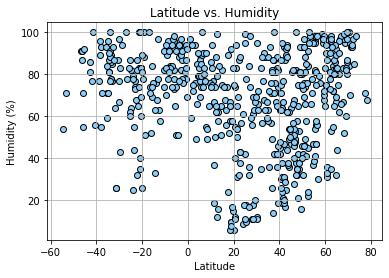

In [30]:
x = cities_df['Latitude']
y = cities_df['Humidity']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.savefig("output_data/lat_hum.png")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

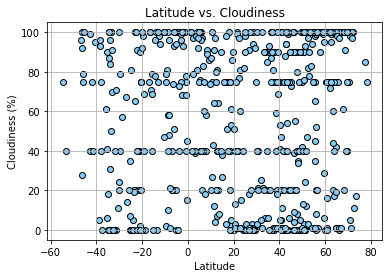

In [29]:
x = cities_df['Latitude']
y = cities_df['Cloudiness']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/lat_cloud.png")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

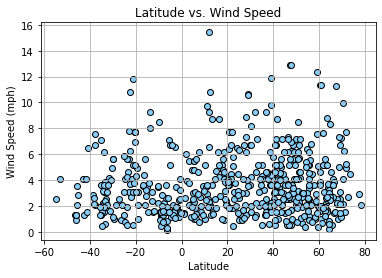

In [28]:
x = cities_df['Latitude']
y = cities_df['Wind_Speed']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.savefig("output_data/lat_wind.png")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression